In [2]:
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [25]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.8.0


Preuzimanje podataka

In [26]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

'/root/.keras/datasets/auto-mpg.data'

In [27]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)
dataset = raw_dataset.copy()
dataset.tail()


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [28]:
dataset.columns

Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model Year', 'Origin'],
      dtype='object')

In [29]:
dataset.shape #broj redova i broj kolona skupa podataka
dataset.shape[0] # broj redova skupa podataka (ukupan broj podataka po kolonama)

398

Sredjivanje podataka

Skup sadrzi neke podatke koje imaju null vrednosti

Najcesci nacin rukovanja podacima koje nedostaju je brisanje (dropping) podataka koje imaju vrednosti koje nedostaju ili ubacivanje (imputing) vrednosti koje nedostaju (njihova aproksimacija prosekom).

In [30]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [31]:
dataset = dataset.dropna() #brisanje null vrednosti

In [32]:
horsepowerKol = dataset['Horsepower'] #popunjavanje null vrednosti mean-om 
horsepower_mean = horsepowerKol.mean()
horsepowerKol.fillna(horsepower_mean,inplace=True)

In [33]:
dataset.corr() #korelaciona matrica 

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
MPG,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
Cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
Displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
Horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
Weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
Acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
Model Year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
Origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [34]:
for x in range(dataset.shape[1]) : # za svaku kolonu racuna njenu srednju vrednost
  m = dataset[dataset.columns[x]].mean()
  print(dataset.columns[x] + ':' + str(m))

MPG:23.44591836734694
Cylinders:5.471938775510204
Displacement:194.41198979591837
Horsepower:104.46938775510205
Weight:2977.5841836734694
Acceleration:15.541326530612228
Model Year:75.9795918367347
Origin:1.5765306122448979


In [35]:
for x in range(dataset.shape[1]) : # za svaku kolonu racuna njenu medijanu
  m = dataset[dataset.columns[x]].median()
  print(dataset.columns[x] + ':' + str(m))

MPG:22.75
Cylinders:4.0
Displacement:151.0
Horsepower:93.5
Weight:2803.5
Acceleration:15.5
Model Year:76.0
Origin:1.0


In [36]:
for x in range(dataset.shape[1]) : # za svaku kolonu racuna njen maksimum
  m = dataset[dataset.columns[x]].max()
  print(dataset.columns[x] + ':' + str(m))

MPG:46.6
Cylinders:8
Displacement:455.0
Horsepower:230.0
Weight:5140.0
Acceleration:24.8
Model Year:82
Origin:3


In [37]:
for x in range(dataset.shape[1]) : # za svaku kolonu racuna njen minimum
  m = dataset[dataset.columns[x]].min()
  print(dataset.columns[x] + ':' + str(m))

MPG:9.0
Cylinders:3
Displacement:68.0
Horsepower:46.0
Weight:1613.0
Acceleration:8.0
Model Year:70
Origin:1


In [72]:
#jos neki nacin izracunavanja statistike
stat = dataset.describe().transpose()
stat

,count,mean,std,min,25%,50%,75%,max
MPG,392.0,23.445918,7.805007,9.0,17.000,22.75,29.000,46.6
Cylinders,392.0,5.471939,1.705783,3.0,4.000,4.00,8.000,8.0
Displacement,392.0,194.411990,104.644004,68.0,105.000,151.00,275.750,455.0
Horsepower,392.0,104.469388,38.491160,46.0,75.000,93.50,126.000,230.0
Weight,392.0,2977.584184,849.402560,1613.0,2225.250,2803.50,3614.750,5140.0
Acceleration,392.0,15.541327,2.758864,8.0,13.775,15.50,17.025,24.8
Model Year,392.0,75.979592,3.683737,70.0,73.000,76.00,79.000,82.0
Europe,392.0,0.173469,0.379136,0.0,0.000,0.00,0.000,1.0
Japan,392.0,0.201531,0.401656,0.0,0.000,0.00,0.000,1.0
USA,392.0,0.625000,0.484742,0.0,0.000,1.00,1.000,1.0


In [71]:
stat['mean']

MPG               23.445918
Cylinders          5.471939
Displacement     194.411990
Horsepower       104.469388
Weight          2977.584184
Acceleration      15.541327
Model Year        75.979592
Europe             0.173469
Japan              0.201531
USA                0.625000
Name: mean, dtype: float64

In [38]:
print(dataset.Origin.unique()) #prikaz jednistvenih vrednosti u koloni
print(dataset["Origin"].unique())

[1 3 2]
[1 3 2]


In [39]:
dataset['Origin'] = dataset['Origin'].map({1:'USA', 2:'Europe', 3:'Japan'}) #elemente kolone menjamo drugim vrednostima u zavisnosti od mapiranja koje prosledimo

In [40]:
dataset.head()



,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA


In [41]:
dataset = pd.get_dummies(dataset, prefix='', prefix_sep='') #vrsimo dummy enkodiranje kategorijske promenljive
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


Podela podataka na trening i test

In [42]:
train_dataset = dataset.sample(frac=0.8,random_state=0) #80% podataka za treniranje
test_dataset = dataset.drop(train_dataset.index) #ostalih 20% podataka za tesiranje

Analiza podataka

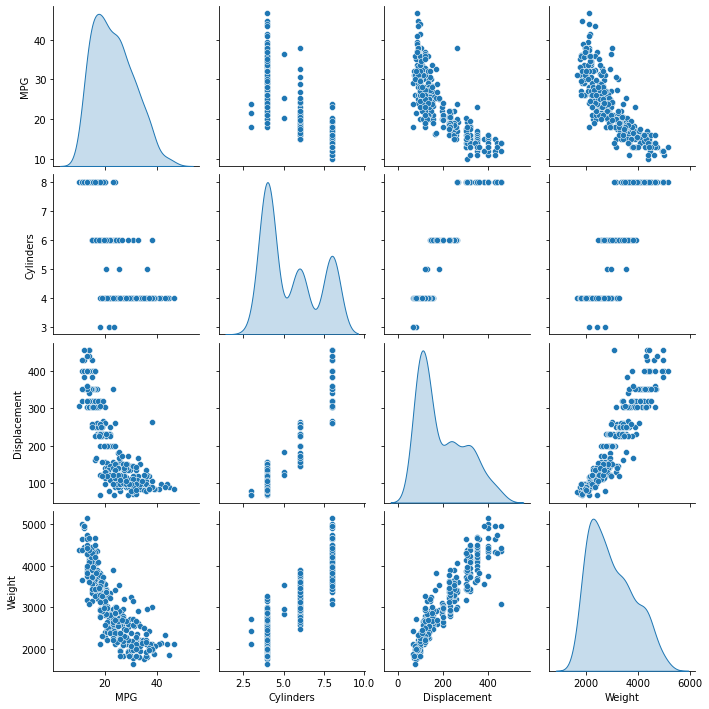

In [43]:
sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde") #medjusobno uporedjujemo atribute u podacima

In [46]:
train_stats = train_dataset.describe() #opsta statistika
train_stats.pop("MPG") #ovaj atribut ignorisemo jer je ciljna promenljiva (ona koja se prediktuje)
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0


In [47]:
train_labels = train_dataset.pop('MPG') #izdvajanje ciljne promenljive
test_labels = test_dataset.pop('MPG')

In [48]:
def norm(x): #standardizacija podataka - podaci su na razlicitim skalama, pa ima smisla izvrsiti njihovu strandardizaciju
  return (x-train_stats['mean']) / train_stats['std'] 
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

Regresioni model

  Definicija modela
 

*   Koriscen je Sequential model ce predstavljati jednu neuronsku mrezu sa propagacijom unapred. Na izlazu ce biti jedan neuron koji ce davati ocenu atributa MPG.
*   Kao funkciju greske koriscen je MSE (mean squared error).
*   Koriscen je RMSprop optimizator.








In [53]:
def build_model():
  model = keras.Sequential([
      layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
      layers.Dense(64, activation = 'relu'),
      layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer = optimizer,
                metrics=['mae','mse'])
  return model

In [54]:
model = build_model()

Pregled modela

In [55]:
model.summary() #pomocu f-je summary mozemo pogledati pregled definisanog modela

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                640       
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


Obucavanje modela



*   Skup za obucavanje cemo podeliti na dva nova skupa, jedan ce biti skup na kome ce se zapravo vrsiti obucavanje (80% originalnog skupa za obucavanje), a validacioni skup cemo koristiti da na kraju svake epohe evaluiramo koliko je dobar nas model.
*   Obucavacemo model 1000 epoha i cuvacemo tacnost na podacima za obucavanje i validaciju tokom treninga.
Funkcija *fit* vraca objekat koji sadrzi neophodne podatke.



In [57]:
EPOCHS = 1000

history = model.fit(
    normed_train_data, train_labels,
    epochs = EPOCHS, validation_split = 0.2, verbose=1)


Epoch 1/1000
8/8 [==============================] - 1s 46ms/step - loss: 571.5345 - mae: 22.6279 - mse: 571.5345 - val_loss: 565.6808 - val_mae: 22.4615 - val_mse: 565.6808
Epoch 2/1000
8/8 [==============================] - 0s 7ms/step - loss: 524.7401 - mae: 21.5914 - mse: 524.7401 - val_loss: 518.2258 - val_mae: 21.3823 - val_mse: 518.2258
Epoch 3/1000
8/8 [==============================] - 0s 7ms/step - loss: 480.9073 - mae: 20.5702 - mse: 480.9073 - val_loss: 467.4407 - val_mae: 20.1833 - val_mse: 467.4407
Epoch 4/1000
8/8 [==============================] - 0s 7ms/step - loss: 433.2529 - mae: 19.4125 - mse: 433.2529 - val_loss: 412.5407 - val_mae: 18.8132 - val_mse: 412.5407
Epoch 5/1000
8/8 [==============================] - 0s 8ms/step - loss: 382.0344 - mae: 18.1057 - mse: 382.0344 - val_loss: 355.1698 - val_mae: 17.2783 - val_mse: 355.1698
Epoch 6/1000
8/8 [==============================] - 0s 7ms/step - loss: 328.8465 - mae: 16.6328 - mse: 328.8465 - val_loss: 297.2604 - val_

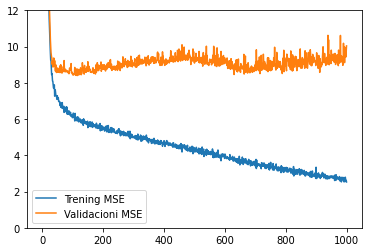

In [58]:
plt.plot(history.epoch, history.history['mse'])
plt.plot(history.epoch, history.history['val_mse'])
plt.ylim([0,12])
plt.legend(['Trening MSE', 'Validacioni MSE'])

In [60]:
hist = pd.DataFrame(history.history) #tabelarni podaci
hist['epoch'] = history.epoch

hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,2.792982,1.072031,2.792982,9.950953,2.357360,9.950953,995
996,2.685934,1.076391,2.685934,9.737487,2.386622,9.737487,996
997,2.552948,0.992115,2.552948,9.427461,2.345290,9.427461,997
998,2.617314,1.050993,2.617314,9.688798,2.337527,9.688798,998
999,2.531563,1.030071,2.531563,10.039537,2.272022,10.039537,999


Zakljucak: 1000 epoha je previse i da pustanje obucavanja da toliko dugo traje ne doprinosi tacnosti modela.

Sad koristimo tehniku Early stopping. Ideja je da se definise skup ogranicenja koja kad se ispune, obucavanje modela ce biti zaustavljeno. Npr. ukoliko se u *k* uzastopnih epoha ne poboljsa vrednost *val_mse* ima smisla zaustaviti obucavanje.

In [63]:
model = build_model()
#Parametar 'patience' je broj epoha koji se razmatra za zaustavljanje
#Parametar 'monitor' predstavlja meru koja se poredi kroz epohe.
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

early_history = model.fit(normed_train_data, train_labels, 
                          epochs = EPOCHS, validation_split=0.2, verbose=1, 
                          callbacks=[early_stop])

Epoch 1/1000
8/8 [==============================] - 1s 87ms/step - loss: 551.0278 - mae: 22.0278 - mse: 551.0278 - val_loss: 531.5491 - val_mae: 21.4764 - val_mse: 531.5491
Epoch 2/1000
8/8 [==============================] - 0s 16ms/step - loss: 488.8459 - mae: 20.5165 - mse: 488.8459 - val_loss: 466.3046 - val_mae: 19.8495 - val_mse: 466.3046
Epoch 3/1000
8/8 [==============================] - 0s 14ms/step - loss: 428.4396 - mae: 18.9750 - mse: 428.4396 - val_loss: 397.7947 - val_mae: 18.0330 - val_mse: 397.7947
Epoch 4/1000
8/8 [==============================] - 0s 12ms/step - loss: 364.0724 - mae: 17.1980 - mse: 364.0724 - val_loss: 327.2939 - val_mae: 16.0523 - val_mse: 327.2939
Epoch 5/1000
8/8 [==============================] - 0s 7ms/step - loss: 299.2836 - mae: 15.3559 - mse: 299.2836 - val_loss: 258.9981 - val_mae: 14.0483 - val_mse: 258.9981
Epoch 6/1000
8/8 [==============================] - 0s 8ms/step - loss: 235.8453 - mae: 13.4696 - mse: 235.8453 - val_loss: 193.7575 - v

Text(0, 0.5, 'MAE[MPG]')

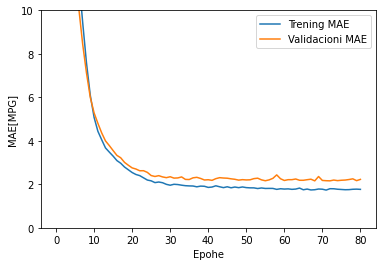

In [64]:
plt.plot(early_history.epoch, early_history.history['mae'])
plt.plot(early_history.epoch, early_history.history['val_mae'])
plt.ylim([0,10])
plt.legend(['Trening MAE', 'Validacioni MAE'])
plt.xlabel('Epohe')
plt.ylabel('MAE[MPG]')

Evaluacija modela

Ponovo obucavamo model, ali na celokupnim podacima za obucavanje (i trening i validacioni) i taj model cemo koristiti za evaluaciju na test skupu.

In [65]:
model = build_model()
early_stop_epochs = 53

final_history = model.fit(normed_train_data, train_labels,
                          epochs = early_stop_epochs, verbose=1)

Epoch 1/53
10/10 [==============================] - 1s 3ms/step - loss: 574.9829 - mae: 22.6842 - mse: 574.9829
Epoch 2/53
10/10 [==============================] - 0s 2ms/step - loss: 510.8300 - mae: 21.2550 - mse: 510.8300
Epoch 3/53
10/10 [==============================] - 0s 3ms/step - loss: 446.4651 - mae: 19.7225 - mse: 446.4651
Epoch 4/53
10/10 [==============================] - 0s 3ms/step - loss: 377.8788 - mae: 17.9423 - mse: 377.8788
Epoch 5/53
10/10 [==============================] - 0s 3ms/step - loss: 305.7965 - mae: 15.9291 - mse: 305.7965
Epoch 6/53
10/10 [==============================] - 0s 3ms/step - loss: 233.9265 - mae: 13.7169 - mse: 233.9265
Epoch 7/53
10/10 [==============================] - 0s 3ms/step - loss: 167.0420 - mae: 11.4403 - mse: 167.0420
Epoch 8/53
10/10 [==============================] - 0s 3ms/step - loss: 110.2402 - mae: 9.1126 - mse: 110.2402
Epoch 9/53
10/10 [==============================] - 0s 3ms/step - loss: 69.0818 - mae: 6.9583 - mse: 69.0

Pregled kako se model ponasa na skupu za testiranje.

In [68]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error {:5.2f} MPG ".format(mae))
print("Testing set Mean Squared Error {:5.2f} MPG ".format(mse))

3/3 - 0s - loss: 6.2147 - mae: 1.9328 - mse: 6.2147 - 80ms/epoch - 27ms/step
Testing set Mean Abs Error  1.93 MPG 
Testing set Mean Squared Error  6.21 MPG 
